In [1]:
# Authored by Ahmad Beirami
# Last modified April 21, 2020
# If you use this notebook, please cite https://arxiv.org/pdf/1801.09021.pdf


%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import itertools

start = time.time()

# Populating the probabilities of all sequences of length N

N = 8 # sequence length
p = np.array([0.5, 0.3, 0.2]) # stochastic vector of probabilities of each character

p = p / sum(p)
A = len(p)
s_A = set()
a = 0
for e in range(A):
    s_A.add(a)
    a += 1

seq = itertools.product(s_A, repeat=N)
log_prob = []
for s in seq:
    ll = 0
    for c in s: # change this part of the logic to support arbitrary non-memoryless sources
        ll += np.log2(p[c])
    log_prob.append(ll)

log_prob.sort(reverse = True)
prob = [2**l for l in log_prob] #probabities of all words of length N sorted from most likely to least likely
    
end = time.time()
print('total time for populating the probabilitues: ' , end - start)


total time for populating the probabilitues:  0.07815384864807129


Alphabet size: 3
Probability vector: [0.5 0.3 0.2]
total time for computing the approximation:  4.348957777023315


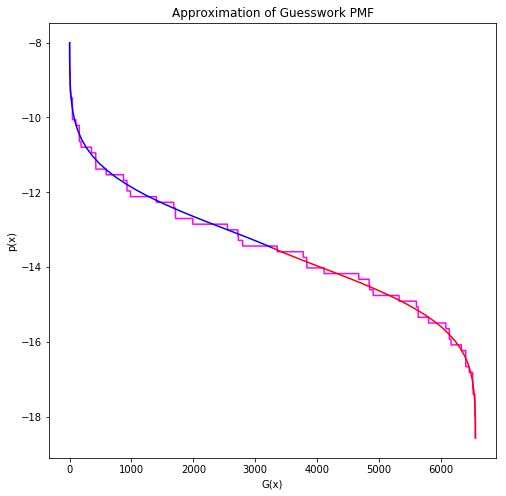

In [2]:
start = time.time()

plt.figure(figsize=(8,8))
plt.title(f"Approximation of Guesswork PMF")
plt.xlabel("G(x)")
plt.ylabel("p(x)");

print("Alphabet size:", A)
print("Probability vector:", p)


rel_ent_alphas = []
rel_ent_alphas_ = []
guesswork_approx = []
guesswork_approx_ = []
alphas = np.exp(np.arange(-6, 3, 0.1))


for a in alphas:
    log_prob_a = [l * a for l in log_prob]
    log_prob_a_ = [l * -a for l in log_prob]

    prob_a = np.exp(log_prob_a) / sum(np.exp(log_prob_a))
    prob_a_ = np.exp(log_prob_a_) / sum(np.exp(log_prob_a_))

    ent_a = np.sum([-p * np.log2(p) for p in prob_a])
    ent_a_= np.sum([-p * np.log2(p) for p in prob_a_])
    
    var_ent_a = np.sum([p * (np.log2(p) + ent_a)**2 for p in prob_a])
    var_ent_a_ = np.sum([p * (np.log2(p) + ent_a_)**2 for p in prob_a_])
        
    rel_ent_alphas.append(np.sum(np.dot(prob_a, log_prob)))
    rel_ent_alphas_.append(np.sum(np.dot(prob_a_, log_prob)))
        
    guesswork_approx.append(ent_a - np.log2(np.sqrt(math.pi/4 * var_ent_a) + np.sqrt(math.pi/4 * var_ent_a + 4)))
    guesswork_approx_.append(ent_a_ - np.log2(np.sqrt(math.pi/4 *  var_ent_a_) + np.sqrt(math.pi/4 * var_ent_a_ + 4)))

plt.plot(log_prob, color='magenta')
plt.plot([2**(g) - 0.5  for g in guesswork_approx], rel_ent_alphas, color='b')
plt.plot([A**N - 2**(g) - 0.5  for g in guesswork_approx_], rel_ent_alphas_, color='r')
end = time.time()

print('total time for computing the approximation: ' , end - start)
